# AcousticZ - Stochastic Ray Tracing for Room Impulse Response simulation

Author: Benedikt Schier

Email: benedikt.schier@rwth-aachen.de

Matriculation number: 420933

# Installation

Assure that the code is installed with python 3.11

In [10]:
pip install git+https://github.com/BeneSchier/AcousticZ

  Cloning https://github.com/BeneSchier/AcousticZ to c:\users\benes\appdata\local\temp\pip-req-build-9yvh1ye6
  Resolved https://github.com/BeneSchier/AcousticZ to commit 3821239d16d62d3dfeba5909bfd129cd7044ba7b
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/BeneSchier/AcousticZ 'C:\Users\Benes\AppData\Local\Temp\pip-req-build-9yvh1ye6'

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Benes\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Introduction
In recent years, there has been a significant rise in the need for computer-based simulations of real-world experiments and applications. Such simulations are often more cost-effective and offer greater flexibility than real-world measurements. Yet, to enable computer-based simulations, it is crucial to ensure a high degree of accuracy and relative efficiency of the simulation method. These were the paramount factors taken into account while selecting the Stochastic Ray Tracing method to simulate Room Impulse Responses. The Stochastic Ray Tracing method negates the need to solve differential equations, making it a very robust and straightforward algorithm to use. 


## What is a Room Impulse Response (RIR)?
To comprehend the meaning of a Room Impulse Response, one may find it beneficial to examine the Impulse Response of a dynamic system in general. The Impulse Response of a dynamic system represents the system's reaction to a brief input signal (impulse), which can be viewed as a response to a momentary disturbance in the system. Regarding room acoustics, the room itself serves as the system in this scenario, and the impulse can be envisioned as a brief audio signal that is introduced to the room. The resulting effects are the room's reverberation and auralization, which are particularly prevalent in caverns or unoccupied halls, for instance.

In the real world, experts use costly microphones, which they set up in the room, to measure Room Impulse Response. Next, they analyze the input signals from these microphones to explore the room's acoustic properties. The signal is generated by speakers that produce a pitch-bending sound, covering a representative frequency range. These microphones are often expensive, and their setup requires preparation time and effort. Real-world experiments offer little flexibility due to the high sensitivity of the microphone-based experiments and the cost and time required to perform them.
The this point on the word "Room Impulse Response" is abbreviated to RIR

# Materials and Methods
## Considerations for choosing the method
There are various methods to simulate a Room Impulse Response (RIR). 
While considering numerical simulations, one may think of solving differential equations that explain the way in which sound waves travel in a room using an appropriate numerical method. The finite difference time domain (FDTD) method uses this exact approach to model the response: It employs a modified finite difference scheme to solve the wave equation. The FDTD method is highly precision, but it can be computationally expensive due to the requirement of solving an equation system at each time interval. Also, it gets complicated to implement when trying to consider all reflection effects. 
Geometric methods that use the room's geometric characteristics are an alternative to numerical approaches. One of these methods is the image-source method, which models the reflections between a transmitter and receiver by creating straight paths (rays) that are defined by a source and an image. Obstacles in the room reflect the rays.
This phenomenon is explained by the application of the symmetrical reflection law. A new source is created whenever a ray hits an obstacle. 

A drawback of the image-source method is its inability to model sound diffusion and diffraction. To model these phenomena, a more advanced approach like the stochastic Ray Tracing method is required. This approach takes the idea of the image source method and extends it to increase its accuracy. The Stochastic Ray Tracing technique produces numerous rays with random directions and models the reflections and energy absorption of each ray individually. When a ray hits an obstacle, sound diffusion and diffraction causes an energy impact at the receiver. The energy impacts at the receiver are recorded via a histogram that tallies the energy fractions in the appropriate time and frequency bin. The beams are monitored within selected frequency ranges and for a defined period. From the constructed histogram an energy envelope can be extracted that can be used to weigh filtered random sample sequences.

The final approach merges the simplicity of the image source method and the precision of the numerical finite difference approach while still remaining relatively easy to implement. For that reason, AcousticZ deploys the stochastic Ray Tracing method to perform the simulation.

## Third party packages
As a first step of a typical workflow the user reads a .obj file that defines the geometry of the room. AcousticZ uses mainly the trimesh python package to handle that input. The .obj provides the needed geometry information as well as the normal vectors for each plane which is needed for the reflection law and the energy calculations. For further calculations numpy is used and for the signal processing that is needed to generate the RIR scipy is used. The further plotting functions were implemented using the matplotlib python package. To read the .wav file for the `Room.applyRIR` function the soundfile package was used. 

In [1]:
import numpy as np
from AcousticZ.Room import Room

## Methods and Implementation
The package works with one main class called "Room" that provides all functionalities and manages the data inside of it. In the current state it is considered that the user uses the functionalities to generate and visualize the data using the given functions (for more information see the documentation)

## Case Studies
The first case study is a shoebox-shaped empty room, it is the same setup as in the Matlab Reference. 

In [2]:
shoebox_file = '../data/example_meshes/shoebox.obj'
shoebox = Room(shoebox_file)

# Define source and receiver coordinates
source = np.array([2.0, 2.0, 2.0])
receiver = np.array([5.0, 5.0, 1.8])

# Adding source 
shoebox.createSource(source)

# Addding receiver
shoebox.createReceiver(receiver, radiusOfReceiverSphere=0.0875)

shoebox.showRoom()

The second case study is a 3D model of a living room 

In [3]:
room_file = '../data/example_meshes/InteriorTest.obj'
room = Room(room_file)

# Define source and receiver coordinates
source = np.array([2.0, 2.0, 2.0])
receiver = np.array([2.0, 2.0, 1.8])

# Adding source 
room.createSource(source)

# Addding receiver
room.createReceiver(receiver, radiusOfReceiverSphere=0.0875)

room.showRoom()

C:\Users\Benes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\AcousticZ\Room.py:40: UserWarning: room is not watertight: possibility of escaping rays
  warnings.warn('room is not watertight: possibility of escaping rays')


***DISCLAIMER:*** It is hard to find geometries that are watertight and free. The living room case study does **not** have a watertight geometry technically but after several testing sessions, that should not be a problem. I could not find other suitable models that are free and watertight; for these reasons I could only provide one example for a complex room geometry.

## Ray Tracing
The first step is the main Ray Tracing algorithm, which is used to determine all reflections and ray hits in the room to assemble the energy histogram. This step is performed by the `Room.performRayTracing` function of AcousticZ. In order to perform the Ray Tracing algorithm the user has to specify a sound source and a receiver, otherwise it is not possible to generate the rays or perform the necessary energy calculations. The rays are created by generating a sample sphere with random directions at the specified sound source location. All the rays are then individually traced for each frequency band over a response time of one second. In the current version of the package, the considered frequency bands are 125Hz, 250Hz, 500Hz, 1000Hz, 2000Hz and 4000Hz. The rays are traced by performing a ray intersection algorithm of the python package trimesh\cite{trimesh} to get the points at which the ray hits obstacles. For each hit an energy impact is evaluated at the receiver that follows this equation which calculates the scattered energy impact on the receiver: 
\begin{align*}
    E_s = E_P \cdot(1-\alpha) \cdot s \cdot\left(1-\cos \frac{\gamma}{2}\right) \cdot 2 \cdot \cos (\Theta)
\end{align*}
with $E_P$ being the energy of the incoming ray shortly before the hit, $\alpha$ being the absorption coefficient of the wall material, $s$ being the scattering coefficient of the wall, $\gamma$ being the opening angle defined by the distance vector between the point of the hit and the receiver and the size of the receiver (see figure) and $\Theta$ being the reflection angle (angle between outgoing ray and normal vector). The energy impacts are all summed up in corresponding histogram bins that refer to the time and frequency:
\begin{align*}
    EnergyHist[time, freq] = \sum_{i}^{} E_{s,i}
\end{align*}

The outgoing direction is calculated via the formula:
\begin{align*}
    dRay_{out} = dRay_{in} - 2 \cdot \left(dRay_{in}\cdot N\right) \cdot N
\end{align*}
with $dRay_{out}$ being the outgoing ray direction, $dRay_{in}$ being the incoming ray direction and $N$ being the normal vector. The used formula in the code is a modified version:
\begin{align*}
    dRay_{out} = \delta \cdot d + \left(1 - \delta\right) \cdot \left(dRay_{in} - 2 \cdot \left(dRay_{in}\cdot N\right) \cdot N \right)
\end{align*}
with $\delta$ being the diffratcion coefficient of the surface material and d being the random component ($1\times3$ vector).


The naive implementation of this formulas lead to an odd behaviour in the Ray Tracing algorithm: The ray-intersection algorithm of the trimesh\cite{trimesh} package found intersection points that lied in planes and after calling the function again with the updated ray direction the algorithm found the same intersection point again so that some of the rays got stuck in planes. To resolve this issue, an offset was added that moves the point of intersection out of the plane by a small factor.

In [4]:
# Perform Ray Tracing with 1000 rays
shoebox.performRayTracing(1000)

room.performRayTracing(1000)

100%|██████████| 6/6 [16:38<00:00, 166.38s/it]


## Generation of the RIR
fter the construction of the energy histogram the data can be used to generate the RIR. The histogram is stored in the \verb|Room| class of the package and the response generation is performed by calling the `Room.generateRIR` function. 
The function first generates a random Poisson Sample Sequence which synthesizes a noise process. The process has the starting time $t_0$ which is calculated by:
\begin{align*}
    t_0=\sqrt[3]{\frac{2 V \ln 2}{4 \pi c^3}} \approx 0,0014 \sqrt[3]{V}, 
\end{align*}
where $V$ is the volume of the room and $c$ is the speed of sound.
 This sequence is processed through six bandpass filters that are centered around the frequencies used for the energy histogram. Therefore the noise process is transformed into the frequency domain and filtered by a Raised Cosine filter with:
$$
    R C F(n)= \begin{cases}0 & \text { if } f<f_{\text { low }} \\ \frac{1}{2}\left(1+\cos \left(\frac{2 \pi f}{f_n}\right)\right) & \text { if } f_{\text {low }} \leq f<f_n \\ \frac{1}{2}\left(1-\cos \left(\frac{2 \pi f}{f_{n+1}}\right)\right) & \text { if } f_n \leq f<f_{\text {high }} \\ 0 & \text { if } f \geq f_{\text {high }}
    \end{cases} 
$$
 where $f_n$ is the corresponding center frequency from $f = [125Hz, 250Hz, 500Hz, 1000Hz, 2000Hz, 4000Hz]$, $f_{low}$ the lower frequency bound with $f_{low} = [115Hz, 225Hz, 450Hz, 900Hz, 1800Hz, 3600]$ and $f_{high}$ with $f_{high} = [135Hz, 275Hz, 550Hz, 1100Hz, 2200Hz, 4400Hz]$.
 We then assemble the signals of the filtered sequences with the corresponding weights:
$$
    \begin{gathered}
s_i=v_i \cdot \sqrt{\frac{E_n(k)}{\sum_{i=g(k-1)+1}^{g(k)} v_i^2}} \cdot \sqrt{\frac{\mathrm{BW}}{f_s / 2}} \\
\text { with } \quad g(k)=\left\lfloor k \cdot f_s \cdot \Delta t\right\rfloor, 
\end{gathered}
$$
where $\Delta t$ denotes the length of the histogram’s time slot, $v_i$ the value of the ith sample of the filtered sequence, $f_s$ the sampling frequency, $BW$ the width of the regarded frequency band $n$, and $E_n(k)$ the energy of the histogram’s kth time slot that relates to the ith sample.

C:\Users\Benes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_spectral_py.py:1492: UserWarning: NOLA condition failed, STFT may not be invertible. Possibly due to missing boundary
  warnings.warn(


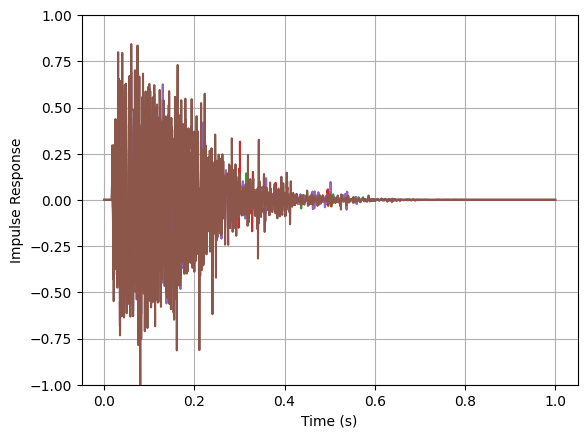

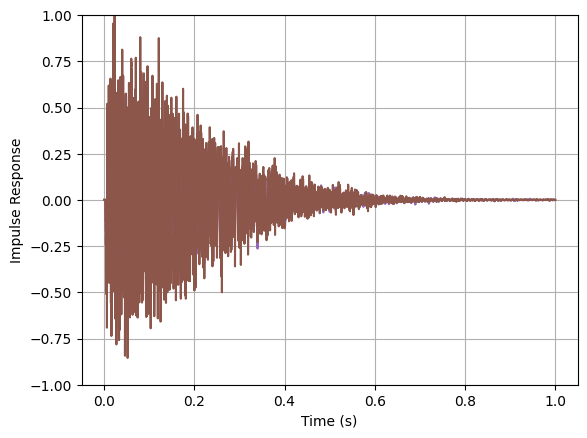

In [5]:
# Generate the Room Impulse Response
shoebox.generateRIR()
shoebox.plotWaveform()

room.generateRIR()
room.plotWaveform()

## Applying the RIR as a filter
The AcousticZ package provides a functionality to filter any user-specified .wav file with the RIR. For that, the ``Room.applyRIR`` function has to be called that performs a simple convolution of the soundfile with the RIR.

In [7]:
audio_file_shoebox = '../data/example_audio/drums.wav'
output_path_shoebox = './out/processed_audio_shoebox.wav'
shoebox.applyRIR(audio_file_shoebox, output_path_shoebox)

audio_file_room = '../data/example_audio/drums.wav'
output_path_room = './out/processed_audio_livingRoom.wav'
room.applyRIR(audio_file_room, output_path_room)

# Discussion
The code of the package could not be validated yet. 
In the process development the code was extended from a validated state where it gave the same as the matlab reference results but at that point the code was not able to simulate more complex geometries and was just able to simulate a simple shoebox geometry. After that the code was expanded with an according .obj file input functionality, adaptions in the Ray Tracing algorithm and volume calculation. While implementing these steps the code gave promising results but after some bugs and errors were spotted the priority was to rather first have a working code without any bugs. Due to limitations in the development time is was not possible to validate the code to this point. All the formulas and equations have been checked and compared to the corresponding formulas from the paper HIER EINFÜGEN and the results at least seem physically meaningful to a certain degree.

In the current state the package generates a warning when executing the ``Room.generateRIR`` function that indictates that the short-time-fourier-transform that is needed to apply the filter may not be invertible. This is likely to be the cause for the spikes in the waveform plot. When attempting to solve this issue by adding a boundary, it introduced a dimension mismatch in the calculations that could not be resolved; therefore the warning remains.  

In the devlopment process it became obvious that the python implementation is very limited in terms of performance. A first loop-based implementation was too slow to call it usable in any way and the approach of vectorizing the loop over the rays (which is implemented in the latest version of the code) improved the performace but it is still very slow. Another possibilities that could improve the performance but are not implemented due to time and priority issues are: 
    
- Precompiling parts of the code with the JIT compiler provided by the numba python package. To realize this helper functions have to be implemented that take the parts of the loop which uses no instanced of python packages other than Numpy because otherwise it is not possible to use the JIT compiler for the function.  
    
- Parallelize the loop over the six frequency bands which can be done in various ways in python.
    
- GPU offloading. Frameworks like CUDA (for Nvidia GPUs) are very powerful and the imeplementation in python really straight forward but it would decrease the compatability of the code because CUDA is just usable for systems with Nvidia GPUs.

But before applying these changes to the code, it really should be considered just using a more performant programming language for this task; for example the python-like JULIA (JIT compiled) or the highly efficient C++ (pre compiled). This languages would avoid the enormous performance overhead and modifications like parallelization or GPU offloading would only become interesting for much more complex geometries or for much more rays. 

Another possible improvment would be to use custom/user-specified frequencies for the evaluations of the histogram and the Impulse Reponse. Furthermore the acoustic characteristics of the wall materials can not be changed in the current version of the code which would be another improvement to let them be specified by the user. This improvement was planned in the development phase but not implemented due to time limitation and the absence of a user-friendly solution. The problem with this functionality is, that custom geomties have many faces that can be distinguished because .obj files carry texture information of the faces which could be used to examine material information but it still needs a translation process that has to be defined: The user has to provide a translation table to translate the corresponding texture names in to material names which then have to be matched to a material dictionary which carries the acoustic coefficitents. It was not possible to find a satisfying solution for this complex process. 

Smaller features that were discarded due to time limitation and priority selection were receiver and source arrays in order to model multiple sound sources and receiver. If we consider a loop based non-vectorized implementation, it would be possible to model dynamically changing sources and receiver. The analysis process could be improved by the functionality to plot a heatmap for all rays hits in the room. 

Even if the code could not be validated and after mentioning all the features that could not be implemented due to time limitation and prioritization of other bugs, it should be clarified that the package captures real world acoustic behavior well enough to approximate auralization and reverbration effects to a degree where it can be used as a audio processing tool to be used in the creative sector as a reverb audio tool for example.

# Conclusion
To conclude, it can be said that the Stochastic Ray Tracing method is simple and straight forward to implement; it can easily be adapted to complex geometries and with just a few modifications it is possible to extend its accuracy even more (as stated in the Discussion Chapter). There is less computational effort then in numerical approaches like the fdtd method which requires to solve an equation system for each time step and therefore it is even suitable for a GPU implementation. But it should be considered to use a different programming language (e.g. C++ or JULIA) for professional implementations due to the weak performance of the python language. \\
The method could not be validated and therefore the accuracy can not be guaranteed, but it still can be said that the results at least seem to be realistic to a certain degree and therefore the package can be used as an audio processing tool as a synthetic reverb effect to modify audio signals. 